In [1]:
import sqlalchemy as sal

endpoint = "capstone.clihskgj8i7s.us-west-2.rds.amazonaws.com"
user="group3"
db="db1"
pw="3qLXGOaxMSoqYfj3yAOY"

engine = sal.create_engine('postgresql://%s:%s@%s/%s' % (user, pw, endpoint, db))

In [2]:
describe_query = '''SELECT
    table_schema || '.' || table_name as show_tables
FROM
    information_schema.tables
WHERE
    table_type = 'BASE TABLE'
AND
    table_schema NOT IN ('pg_catalog', 'information_schema');'''


table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='pemslocs';'''
q = engine.execute(table_description)

In [3]:
q = engine.execute(table_description)

In [4]:
#engine.execute('describe table traffic')
q.fetchall()

[('sid', 'integer', None),
 ('fwy', 'smallint', None),
 ('direc', 'character', 1),
 ('district', 'smallint', None),
 ('county', 'smallint', None),
 ('city', 'integer', None),
 ('state_pm', 'character varying', None),
 ('abs_pm', 'double precision', None),
 ('latitude', 'double precision', None),
 ('longitude', 'double precision', None),
 ('length', 'double precision', None),
 ('stype', 'character varying', 2),
 ('lanes', 'smallint', None),
 ('name', 'character varying', None)]

In [5]:
nodes = engine.execute('select distinct sid,latitude,longitude from pemslocs where district = 11').fetchall()

In [6]:
import pandas as pd
#pd.DataFrame(nodes)

In [7]:
engine.execute('select distinct sid,latitude,longitude from pemslocs where district = 11').fetchall()

[(1108723, 33.064772, -117.292309),
 (1115972, 32.608399, -117.036523),
 (1114035, 32.788076, -117.2069),
 (1108565, 32.821751, -117.146602),
 (1108544, 33.069784, -117.069615),
 (1114721, 32.561106, -117.067228),
 (1119890, 33.073419, -117.294587),
 (1113771, 32.966186, -117.177595),
 (1108676, 32.780507, -117.112857),
 (1116313, 32.803133, -116.964952),
 (1108534, 32.833224, -117.118598),
 (1114318, 32.723198, -117.150182),
 (1116423, 32.639609, -117.054617),
 (1122068, 33.048098, -117.286976),
 (1119666, 33.017512, -117.272059),
 (1119822, 32.931143, -117.240825),
 (1108379, 32.713119, -117.133405),
 (1126301, 32.857517, -117.184366),
 (1108604, 32.727284, -117.167641),
 (1126036, 33.127047, -117.109335),
 (1115438, 32.760171, -117.170959),
 (1114211, 32.694337, -117.124759),
 (1126231, 33.329945, -117.159014),
 (1108507, 32.950106, -117.243571),
 (1108463, 33.17092, -117.346811),
 (1108761, 33.183222, -117.296449),
 (1126497, 32.564398, -116.949606),
 (1108429, 32.959072, -117.0994

In [8]:
table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='traffic';'''
q = engine.execute(table_description)
q.fetchall()

[('timestamp', 'timestamp without time zone', None),
 ('station', 'integer', None),
 ('samples', 'smallint', None),
 ('pct_observed', 'smallint', None),
 ('total_flow', 'integer', None),
 ('avg_occupancy', 'double precision', None),
 ('avg_speed', 'double precision', None)]

In [ ]:
q = engine.execute("select count(distinct station) from traffic where timestamp >= '01-01-2020' and timestamp < '07-01-2020'")

In [31]:
q = engine.execute("select distinct station from traffic where timestamp >= '01-01-2020' and timestamp < '07-01-2020' and station > 1100000")

In [29]:
q.fetchall()

[(1125276,)]

In [30]:
q = engine.execute("select distinct station from traffic where timestamp >= '01-01-2020' and timestamp < '07-01-2020' limit 1")

In [34]:
# Create index script 
q = engine.execute("create index if not exists station_index on traffic (station)")

In [36]:
engine.execute("create index if not exists time_index on traffic (timestamp)")

In [38]:
engine.execute("select count(*) from traffic where station = 1125276").fetchall()

[(170922,)]

In [5]:
index_check = '''SELECT
    tablename,
    indexname,
    indexdef
FROM
    pg_indexes
WHERE
    schemaname = 'public'
ORDER BY
    tablename,
    indexname;
'''

engine.execute(index_check).fetchall()

[('covidcases', 'cloc_index', 'CREATE INDEX cloc_index ON public.covidcases USING btree (cloc)'),
 ('covidcases', 'covidcases_cloc_rdate_ctype_key', 'CREATE UNIQUE INDEX covidcases_cloc_rdate_ctype_key ON public.covidcases USING btree (cloc, rdate, ctype)'),
 ('covidcases', 'covidcases_pkey', 'CREATE UNIQUE INDEX covidcases_pkey ON public.covidcases USING btree (cid)'),
 ('covidlocs', 'covidlocs_pkey', 'CREATE UNIQUE INDEX covidlocs_pkey ON public.covidlocs USING btree (uid)'),
 ('covidlocs', 'fips_index', 'CREATE INDEX fips_index ON public.covidlocs USING btree (fips)'),
 ('hospitals', 'hospitals_pkey', 'CREATE UNIQUE INDEX hospitals_pkey ON public.hospitals USING btree (oshpd_id)'),
 ('pemslocs', 'pemslocs_pkey', 'CREATE UNIQUE INDEX pemslocs_pkey ON public.pemslocs USING btree (sid)'),
 ('traffic', 'station_index', 'CREATE INDEX station_index ON public.traffic USING btree (station)'),
 ('traffic', 'time_index', 'CREATE INDEX time_index ON public.traffic USING btree ("timestamp")'),


In [6]:
### Fetching data for January - April 2020

In [5]:
import pandas as pd
from time import time
start = time()

data = engine.execute("select * from traffic_bay where timestamp > '01-01-2020' and timestamp <= '06-30-2020'").fetchall()
dataset = pd.DataFrame(data)
# Dataset = dataset.set_index(0)
# values = speed
data_table = pd.pivot_table(dataset,values = 6,index = 0, columns = 1)

end = time()

print('Time taken to pivot %f'%(end-start))

Time taken to pivot 285.005394


In [6]:
(data_table.index[1] - data_table.index[0]).seconds

300

In [7]:
for i in range(1,len(data_table.index)):
    if (data_table.index[i] - data_table.index[i-1]).seconds != 300:
        print(data_table.index[i],'|',data_table.index[i-1])

2020-01-16 13:45:00 | 2020-01-16 13:35:00
2020-03-08 03:00:00 | 2020-03-08 01:55:00
2020-04-13 12:20:00 | 2020-04-13 12:10:00
2020-06-28 06:45:00 | 2020-06-28 06:35:00


In [8]:
table_description = ''' select column_name, data_type, character_maximum_length
 from INFORMATION_SCHEMA.COLUMNS where table_name ='traffic_bay';'''
q = engine.execute(table_description)

In [9]:
q.fetchall()

[('timestamp', 'timestamp without time zone', None),
 ('station', 'integer', None),
 ('samples', 'smallint', None),
 ('pct_observed', 'smallint', None),
 ('total_flow', 'integer', None),
 ('avg_occupancy', 'double precision', None),
 ('avg_speed', 'double precision', None)]

In [10]:
import datetime
time = datetime.datetime(2020,3,8,3,0,0)
time

datetime.datetime(2020, 3, 8, 3, 0)

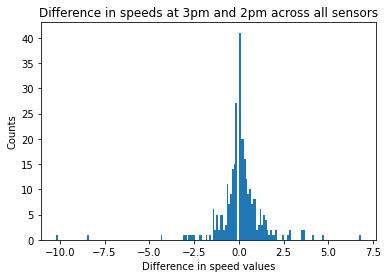

In [12]:
import matplotlib.pyplot as plt

# Shape looks normal at 320 sensors, with most of the points not having too much variation in 

plt.hist(data_table.loc['2020-03-08 03:00:00'] - data_table.loc['2020-03-08 01:55:00'],bins=175)
plt.title('Difference in speeds at 3pm and 2pm across all sensors')
plt.xlabel('Difference in speed values')
plt.ylabel('Counts')
plt.show()

In [41]:
df = pd.read_hdf('DCRNN_PyTorch/data/pems-bay.h5')

NameError: name 'pd' is not defined

In [125]:
!pwd

/home/akash/Desktop


In [42]:
import pandas as pd
hdf=pd.HDFStore('~/Downloads/pems-bay.h5')

In [43]:
for item in hdf.items():
    print(item)

('/speed', /speed (Group) ''
  children := ['axis0' (Array), 'axis1' (Array), 'block0_items' (Array), 'block0_values' (Array)])


In [44]:
hdf['speed'].index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:05:00',
               '2017-01-01 00:10:00', '2017-01-01 00:15:00',
               '2017-01-01 00:20:00', '2017-01-01 00:25:00',
               '2017-01-01 00:30:00', '2017-01-01 00:35:00',
               '2017-01-01 00:40:00', '2017-01-01 00:45:00',
               ...
               '2017-06-30 23:10:00', '2017-06-30 23:15:00',
               '2017-06-30 23:20:00', '2017-06-30 23:25:00',
               '2017-06-30 23:30:00', '2017-06-30 23:35:00',
               '2017-06-30 23:40:00', '2017-06-30 23:45:00',
               '2017-06-30 23:50:00', '2017-06-30 23:55:00'],
              dtype='datetime64[ns]', length=52116, freq=<pandas._libs.properties.CachedProperty object at 0x7f5bd4fa1dc0>)

In [60]:
hdf['speed'].values.dtype

dtype('float64')

In [53]:
data_table.values # -> the original ordering.  Rearranged the column index 

array([[71.7, 68. , 66.7, ..., 66. , 70.3, 67. ],
       [71.7, 68. , 67.2, ..., 66.6, 70.3, 67.5],
       [71.8, 67.8, 67.4, ..., 66.5, 70.9, 67.6],
       ...,
       [71.3, 62. , 67.7, ..., 66.9, 70.4, 65.9],
       [69.5, 62.1, 68.2, ..., 67.2, 71. , 67.5],
       [70.4, 62.2, 68. , ..., 65.8, 70.7, 67.2]])

In [139]:
df = hdf['speed']

for i in range(1,len(df.index)):
    if (df.index[i] - df.index[i-1]).seconds != 300:
        print(df.index[i],'|',df.index[i-1])

2017-03-12 03:00:00 | 2017-03-12 01:55:00


In [138]:
hdf['speed'].shape

(52116, 325)

In [142]:
data_table.shape
# Makes sense , since we have 3 , missing values

(52113, 320)

In [152]:
# Not functional sensor IDs
set(df.columns).difference(set(data_table.columns))

{402288, 402289, 402368, 402369, 404554}

In [82]:
import numpy as np
import os

def generate_graph_seq2seq_io_data(df, x_offsets, y_offsets, add_time_in_day=True, add_day_in_week=False, scaler=None):
    """
    Generate samples from
    :param df:
    :param x_offsets:
    :param y_offsets:
    :param add_time_in_day:
    :param add_day_in_week:
    :param scaler:
    :return:
    # x: (epoch_size, input_length, num_nodes, input_dim)
    # y: (epoch_size, output_length, num_nodes, output_dim)
    """

    num_samples, num_nodes = df.shape
    data = np.expand_dims(df.values, axis=-1)
    data_list = [data]
    if add_time_in_day:
        time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
        time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))
        data_list.append(time_in_day)
    if add_day_in_week:
        day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
        day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1
        data_list.append(day_in_week)

    data = np.concatenate(data_list, axis=-1)
    # epoch_len = num_samples + min(x_offsets) - max(y_offsets)
    x, y = [], []
    # t is the index of the last observation.
    min_t = abs(min(x_offsets))
    max_t = abs(num_samples - abs(max(y_offsets)))  # Exclusive
    for t in range(min_t, max_t):
        x_t = data[t + x_offsets, ...]
        y_t = data[t + y_offsets, ...]
        x.append(x_t)
        y.append(y_t)
    x = np.stack(x, axis=0)
    y = np.stack(y, axis=0)
    return x, y


In [83]:
def generate_train_val_test(df):
    
    # 0 is the latest observed sample.
    x_offsets = np.sort(
        # np.concatenate(([-week_size + 1, -day_size + 1], np.arange(-11, 1, 1)))
        np.concatenate((np.arange(-11, 1, 1),))
    )
    # Predict the next one hour
    y_offsets = np.sort(np.arange(1, 13, 1))
    # x: (num_samples, input_length, num_nodes, input_dim)
    # y: (num_samples, output_length, num_nodes, output_dim)
    x, y = generate_graph_seq2seq_io_data(
        df,
        x_offsets=x_offsets,
        y_offsets=y_offsets,
        add_time_in_day=True,
        add_day_in_week=False,
    )

    print("x shape: ", x.shape, ", y shape: ", y.shape)
    # Write the data into npz file.
    # num_test = 6831, using the last 6831 examples as testing.
    # for the rest: 7/8 is used for training, and 1/8 is used for validation.
    num_samples = x.shape[0]
    num_test = round(num_samples * 0.2)
    num_train = round(num_samples * 0.7)
    num_val = num_samples - num_test - num_train

    # train
    x_train, y_train = x[:num_train], y[:num_train]
    # val
    x_val, y_val = (
        x[num_train: num_train + num_val],
        y[num_train: num_train + num_val],
    )
    # test
    x_test, y_test = x[-num_test:], y[-num_test:]
    
    datasets = {}
    for cat in ["train", "val", "test"]:
        _x, _y = locals()["x_" + cat], locals()["y_" + cat]
        print(cat, "x: ", _x.shape, "y:", _y.shape)
        np.savez_compressed(
            os.path.join('pems_train_2020/sample', "%s.npz" % cat),
            x=_x,
            y=_y,
            x_offsets=x_offsets.reshape(list(x_offsets.shape) + [1]),
            y_offsets=y_offsets.reshape(list(y_offsets.shape) + [1]),
        )
        datasets["x_" + cat] = _x
        datasets["y_" + cat] = _y
        
    return datasets

In [20]:
!mkdir -p pems_train_2020/sample/

In [84]:
generate_train_val_test(data_table)

x shape:  (52090, 12, 320, 2) , y shape:  (52090, 12, 320, 2)
train x:  (36463, 12, 320, 2) y: (36463, 12, 320, 2)
val x:  (5209, 12, 320, 2) y: (5209, 12, 320, 2)
test x:  (10418, 12, 320, 2) y: (10418, 12, 320, 2)


{'x_train': array([[[[7.17000000e+01, 3.47222222e-03],
          [6.80000000e+01, 3.47222222e-03],
          [6.67000000e+01, 3.47222222e-03],
          ...,
          [6.60000000e+01, 3.47222222e-03],
          [7.03000000e+01, 3.47222222e-03],
          [6.70000000e+01, 3.47222222e-03]],
 
         [[7.17000000e+01, 6.94444444e-03],
          [6.80000000e+01, 6.94444444e-03],
          [6.72000000e+01, 6.94444444e-03],
          ...,
          [6.66000000e+01, 6.94444444e-03],
          [7.03000000e+01, 6.94444444e-03],
          [6.75000000e+01, 6.94444444e-03]],
 
         [[7.18000000e+01, 1.04166667e-02],
          [6.78000000e+01, 1.04166667e-02],
          [6.74000000e+01, 1.04166667e-02],
          ...,
          [6.65000000e+01, 1.04166667e-02],
          [7.09000000e+01, 1.04166667e-02],
          [6.76000000e+01, 1.04166667e-02]],
 
         ...,
 
         [[7.10000000e+01, 3.47222222e-02],
          [6.75000000e+01, 3.47222222e-02],
          [6.64000000e+01, 3.47222222e-

In [86]:
!cp pems_train_2020/sample/*.npz new_dcrnn/DCRNN_PyTorch/data/PEMS-BAY/

In [170]:
data_table.values.shape

(52113, 320)

In [172]:
np.expand_dims(data_table.values, axis=-1).shape

(52113, 320, 1)

In [19]:
import pickle

In [20]:
bay = pickle.load(open('DCRNN_PyTorch/data/sensor_graph/adj_mx_bay.pkl','rb'),encoding= 'latin1')

In [21]:
bay

[['400001',
  '400017',
  '400030',
  '400040',
  '400045',
  '400052',
  '400057',
  '400059',
  '400065',
  '400069',
  '400073',
  '400084',
  '400085',
  '400088',
  '400096',
  '400097',
  '400100',
  '400104',
  '400109',
  '400122',
  '400147',
  '400148',
  '400149',
  '400158',
  '400160',
  '400168',
  '400172',
  '400174',
  '400178',
  '400185',
  '400201',
  '400206',
  '400209',
  '400213',
  '400221',
  '400222',
  '400227',
  '400236',
  '400238',
  '400240',
  '400246',
  '400253',
  '400257',
  '400258',
  '400268',
  '400274',
  '400278',
  '400280',
  '400292',
  '400296',
  '400298',
  '400330',
  '400336',
  '400343',
  '400353',
  '400372',
  '400394',
  '400400',
  '400414',
  '400418',
  '400429',
  '400435',
  '400436',
  '400440',
  '400449',
  '400457',
  '400461',
  '400464',
  '400479',
  '400485',
  '400499',
  '400507',
  '400508',
  '400514',
  '400519',
  '400528',
  '400545',
  '400560',
  '400563',
  '400567',
  '400581',
  '400582',
  '400586',
  '4

In [22]:
[str(each) for each in data_table.columns]

NameError: name 'data_table' is not defined

In [23]:
adj_max = bay[2]
sensor_ind = bay[1]

In [30]:
adj_max.dtype

dtype('float32')

In [31]:
import numpy as np
new_adj_max = np.zeros(shape = (320,320))

In [32]:
old_ind_sensor = {sensor_ind[key]:key for key in sensor_ind}

In [33]:
new_sensor_ind = {str(data_table.columns[i]):i for i in range(320)}
new_ind_sensor = {i:str(data_table.columns[i]) for i in range(320)}

In [95]:
new_sensor_ind

{'400001': 0,
 '400017': 1,
 '400030': 2,
 '400040': 3,
 '400045': 4,
 '400052': 5,
 '400057': 6,
 '400059': 7,
 '400065': 8,
 '400069': 9,
 '400073': 10,
 '400084': 11,
 '400085': 12,
 '400088': 13,
 '400096': 14,
 '400097': 15,
 '400100': 16,
 '400104': 17,
 '400109': 18,
 '400122': 19,
 '400147': 20,
 '400148': 21,
 '400149': 22,
 '400158': 23,
 '400160': 24,
 '400168': 25,
 '400172': 26,
 '400174': 27,
 '400178': 28,
 '400185': 29,
 '400201': 30,
 '400206': 31,
 '400209': 32,
 '400213': 33,
 '400221': 34,
 '400222': 35,
 '400227': 36,
 '400236': 37,
 '400238': 38,
 '400240': 39,
 '400246': 40,
 '400253': 41,
 '400257': 42,
 '400258': 43,
 '400268': 44,
 '400274': 45,
 '400278': 46,
 '400280': 47,
 '400292': 48,
 '400296': 49,
 '400298': 50,
 '400330': 51,
 '400336': 52,
 '400343': 53,
 '400353': 54,
 '400372': 55,
 '400394': 56,
 '400400': 57,
 '400414': 58,
 '400418': 59,
 '400429': 60,
 '400435': 61,
 '400436': 62,
 '400440': 63,
 '400449': 64,
 '400457': 65,
 '400461': 66,
 '400

In [34]:
indices_to_remove = [sensor_ind[str(i)] for i in [402288, 402289, 402368, 402369, 404554]]

In [90]:
sensor_ind

{'401391': 148,
 '409528': 317,
 '407157': 263,
 '401014': 138,
 '401948': 183,
 '407176': 269,
 '401129': 139,
 '407174': 268,
 '401154': 140,
 '401606': 163,
 '400479': 68,
 '401997': 188,
 '407153': 261,
 '400227': 36,
 '401495': 155,
 '400222': 35,
 '400221': 34,
 '407348': 299,
 '403406': 232,
 '400700': 96,
 '400149': 22,
 '400148': 21,
 '400147': 20,
 '401567': 161,
 '400677': 92,
 '402285': 206,
 '400709': 97,
 '402283': 204,
 '400673': 91,
 '400904': 122,
 '401845': 172,
 '400869': 119,
 '407184': 274,
 '401846': 173,
 '407180': 272,
 '407181': 273,
 '402361': 213,
 '402360': 212,
 '402363': 215,
 '400863': 118,
 '402365': 217,
 '402364': 216,
 '402367': 219,
 '402366': 218,
 '407370': 306,
 '402060': 194,
 '402362': 214,
 '407202': 282,
 '400336': 52,
 '400330': 51,
 '400560': 77,
 '400563': 78,
 '400030': 2,
 '401489': 154,
 '400238': 38,
 '400567': 79,
 '400964': 131,
 '404640': 252,
 '402373': 225,
 '400236': 37,
 '407359': 301,
 '403404': 231,
 '400648': 85,
 '400649': 86

In [35]:
for i in range(320):
    node = new_ind_sensor[i]
    connections = adj_max[sensor_ind[node]] # Retrieves 325 connections to that node from earlier index.
    for j in range(len(connections)):
        if old_ind_sensor[j] not in ['402288', '402289', '402368', '402369', '404554']: 
            new_adj_max[i][new_sensor_ind[old_ind_sensor[j]]] = connections[j]

In [38]:
new_adj_max = new_adj_max.astype('float32')

In [97]:
new_adj_max == new_adj_max.T

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ..., False,  True, False],
       [ True,  True,  True, ..., False, False,  True]])

In [39]:
new_bay = [[str(each) for each in data_table.columns],new_sensor_ind,new_adj_max]

In [40]:
pickle.dump(new_bay,open('pems_train_2020/adj_mx_new_bay.pkl','wb'))

In [43]:
!pip install stats

     |████████████████████████████████| 127 kB 3.2 MB/s eta 0:00:01
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24278 sha256=f38db3eba20ba953ebf24ceeb4d9cc113aaf455dece69b06f802fd9875c8b4bd
  Stored in directory: /home/akash/.cache/pip/wheels/e3/1c/58/620049eecc13fb5b4920470895e07a39f86e889a0a58b11976
Successfully built stats


### Attempting plotting of some distributions (Failure rate)

In [77]:
# Plotting poison
import scipy.stats as stats
# Simulates 100 minutes and how many events occur across each minute.

stats.poisson.rvs(2,size = 100)

array([0, 2, 2, 5, 1, 1, 1, 3, 1, 0, 1, 2, 5, 4, 0, 4, 2, 2, 4, 4, 2, 3,
       0, 1, 0, 1, 4, 1, 1, 1, 1, 1, 2, 2, 4, 0, 2, 1, 6, 1, 1, 2, 2, 3,
       1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 4, 1, 2, 0, 2, 4, 2, 1,
       2, 0, 1, 2, 2, 2, 4, 2, 1, 0, 4, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 5, 3, 4, 1, 0, 1, 2, 3, 2])

In [78]:
# Simulates time to failure
stats.expon.rvs(2,size = 100)

array([2.74363644, 2.32708679, 2.16066847, 2.73020556, 2.54827477,
       3.9090963 , 2.37527762, 3.40064033, 5.49347266, 2.09653387,
       2.54711013, 4.03182909, 2.46756115, 2.58757608, 2.24663599,
       2.29215742, 3.8125457 , 2.06803057, 2.19115345, 5.14141037,
       2.81142837, 2.85670882, 2.69253392, 2.37633442, 5.47584371,
       2.34661932, 2.2034611 , 2.28533986, 3.85482762, 2.66284808,
       4.81797275, 2.41778164, 3.71951994, 3.1937148 , 3.18814116,
       4.82000549, 2.69036983, 2.08954639, 2.31660561, 5.34452993,
       2.51714066, 2.46860357, 2.19738484, 2.62523554, 3.22656151,
       2.10257266, 3.49460809, 4.33794848, 2.98697896, 5.42193985,
       2.46947276, 3.05536876, 2.33969802, 2.4297229 , 4.78262134,
       2.23290972, 3.90591899, 2.33857248, 2.50624221, 2.19875515,
       2.89945642, 4.60041892, 2.12135242, 2.04596457, 5.56133506,
       3.62525417, 2.07666035, 3.58107545, 4.0213053 , 2.21177122,
       2.20204971, 2.42278693, 2.29665042, 2.88390219, 2.06080

In [89]:
# Simulates time to failure with changing probabilities.
# As we increase the shape, the time to failure starts matching our characteristic life.
stats.weibull_min.rvs(1.5,scale = 2,size = 100)

array([2.45881185, 0.47567336, 0.06405335, 1.34514955, 0.84022272,
       0.83522017, 2.2394078 , 3.2183615 , 2.04943898, 2.36078048,
       1.39355473, 1.11177913, 0.13504255, 1.28345371, 2.73805983,
       0.90306848, 0.4687071 , 1.61092457, 1.92525439, 5.49124747,
       0.51154141, 1.31447001, 2.21662801, 1.58617653, 1.860818  ,
       0.63004208, 2.04657885, 3.03249397, 1.8184375 , 2.62974186,
       3.24425049, 0.1526503 , 1.64421726, 1.43487579, 1.99818695,
       1.8843422 , 0.83476095, 5.23998872, 1.80531014, 0.08907324,
       2.59856137, 1.65601897, 1.42347915, 0.55542221, 0.59361754,
       1.44562536, 0.81896811, 5.84647977, 1.83163307, 2.84264627,
       0.6596794 , 0.17066793, 1.18494867, 1.43589222, 0.50838919,
       0.67008056, 3.95827475, 3.07455984, 2.48099084, 0.73458675,
       0.38265352, 4.27167459, 0.98616867, 1.23833118, 0.80766605,
       1.35960017, 0.4100884 , 0.74656361, 1.93302733, 0.73560273,
       1.58734011, 1.27642119, 3.38551662, 2.8804613 , 2.66383

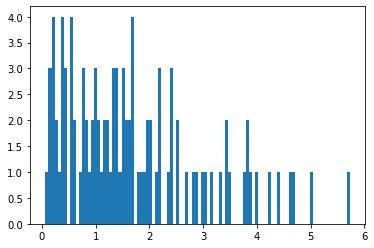

In [81]:
import matplotlib.pyplot as plt

# Any of these do not form normal distribution

plt.hist(vals,bins = 100)
plt.show()

### Analyzing predictions

In [22]:
preds = np.load('new_dcrnn/DCRNN_PyTorch/data/new_dcrnn_predictions.npz')

In [39]:
preds['truth'][11,:,0]

array([69.9     , 70.799995, 71.2     , 71.3     , 71.      , 70.4     ,
       71.1     , 70.2     , 70.      , 70.5     , 70.2     , 70.5     ,
       70.4     , 71.5     , 72.6     , 70.6     , 70.799995, 70.1     ,
       71.      , 71.2     , 71.4     , 71.7     , 72.      , 71.1     ,
       71.9     , 71.5     , 71.      , 71.9     , 71.8     , 70.5     ,
       71.3     , 71.5     , 72.8     , 72.6     , 72.4     , 71.6     ,
       71.3     , 71.6     , 71.6     , 71.3     , 71.2     , 72.3     ,
       72.1     , 70.7     , 71.3     , 71.2     , 71.3     , 70.9     ,
       71.2     , 71.6     , 71.4     , 72.9     , 72.1     , 71.7     ,
       72.2     , 72.3     , 71.8     , 71.1     , 71.5     , 71.9     ,
       70.6     , 71.1     , 71.7     , 71.3     , 71.5     , 70.2     ,
       71.3     , 71.5     , 71.1     , 71.4     , 70.7     , 71.1     ,
       71.1     , 72.8     , 71.4     , 70.299995, 72.      , 71.1     ,
       71.4     , 71.      , 70.5     , 70.      , 

In [40]:
preds['prediction'][11,:,0]

array([62.46686 , 62.46903 , 62.465252, 62.4629  , 62.452267, 62.44184 ,
       62.43701 , 62.440132, 62.447033, 62.446915, 62.448215, 62.45837 ,
       62.46096 , 62.468597, 62.477093, 62.48426 , 62.48806 , 62.487213,
       62.49095 , 62.48863 , 62.485645, 62.486984, 62.486397, 62.487762,
       62.488358, 62.495304, 62.50686 , 62.50425 , 62.502777, 62.497746,
       62.499866, 62.50358 , 62.507748, 62.51253 , 62.517754, 62.51648 ,
       62.519722, 62.520237, 62.51782 , 62.521618, 62.5245  , 62.519157,
       62.519398, 62.521244, 62.529858, 62.535656, 62.53864 , 62.536427,
       62.532864, 62.532345, 62.5326  , 62.531303, 62.5299  , 62.535065,
       62.538143, 62.532234, 62.530598, 62.52947 , 62.529625, 62.527824,
       62.52819 , 62.530903, 62.532043, 62.540688, 62.543514, 62.542976,
       62.54531 , 62.5482  , 62.547985, 62.543995, 62.524643, 62.49578 ,
       62.461197, 62.433567, 62.414433, 62.396244, 62.382286, 62.3594  ,
       62.345226, 62.329334, 62.304333, 62.2755  , 

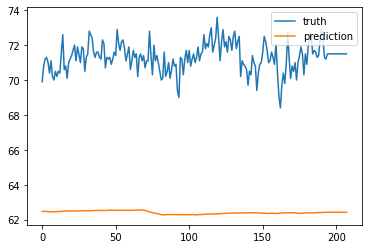

In [45]:
import matplotlib.pyplot as plt

# 1000 data points - test data

plt.plot(preds['truth'][11,:,0],label = "truth")
plt.plot(preds['prediction'][11,:,0],label = "prediction")
plt.title('Predictions after an hour and actual values')
plt.legend(loc = "upper right")
plt.show()

In [112]:
datasets = generate_train_val_test(data_table)

x shape:  (52090, 12, 320, 2) , y shape:  (52090, 12, 320, 2)
train x:  (36463, 12, 320, 2) y: (36463, 12, 320, 2)
val x:  (5209, 12, 320, 2) y: (5209, 12, 320, 2)
test x:  (10418, 12, 320, 2) y: (10418, 12, 320, 2)


In [113]:
datasets

{'x_train': array([[[[7.17000000e+01, 3.47222222e-03],
          [6.80000000e+01, 3.47222222e-03],
          [6.67000000e+01, 3.47222222e-03],
          ...,
          [6.60000000e+01, 3.47222222e-03],
          [7.03000000e+01, 3.47222222e-03],
          [6.70000000e+01, 3.47222222e-03]],
 
         [[7.17000000e+01, 6.94444444e-03],
          [6.80000000e+01, 6.94444444e-03],
          [6.72000000e+01, 6.94444444e-03],
          ...,
          [6.66000000e+01, 6.94444444e-03],
          [7.03000000e+01, 6.94444444e-03],
          [6.75000000e+01, 6.94444444e-03]],
 
         [[7.18000000e+01, 1.04166667e-02],
          [6.78000000e+01, 1.04166667e-02],
          [6.74000000e+01, 1.04166667e-02],
          ...,
          [6.65000000e+01, 1.04166667e-02],
          [7.09000000e+01, 1.04166667e-02],
          [6.76000000e+01, 1.04166667e-02]],
 
         ...,
 
         [[7.10000000e+01, 3.47222222e-02],
          [6.75000000e+01, 3.47222222e-02],
          [6.64000000e+01, 3.47222222e-

In [3]:
import numpy as np
preds_new = np.load('new_dcrnn/DCRNN_PyTorch/data/new_dcrnn_predictions.npz')

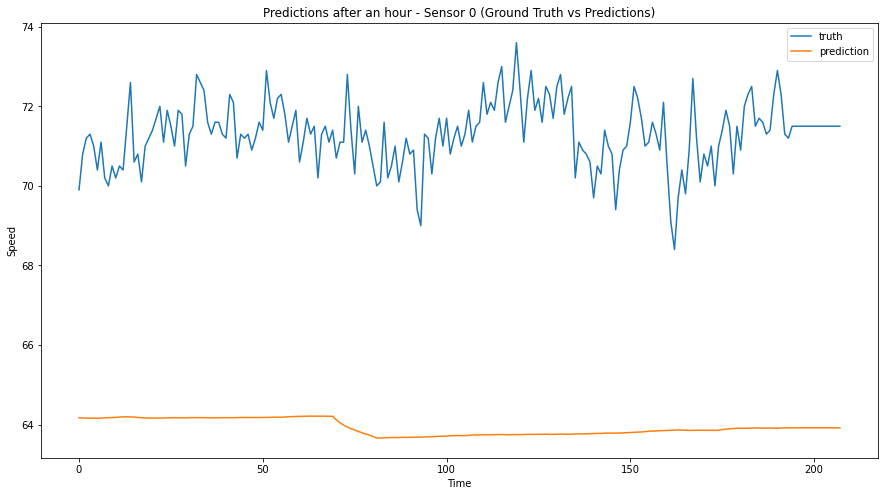

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plt.plot(preds_new['truth'][11,:,0],label = "truth")
plt.plot(preds_new['prediction'][11,:,0],label = "prediction")
plt.title('Predictions after an hour - Sensor 0 (Ground Truth vs Predictions)')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend(loc = "upper right")
plt.show()

In [71]:
preds['truth']

array([[[70.5     , 35.399998, 58.399998, ..., 66.799995, 69.2     ,
         66.799995],
        [69.799995, 41.      , 60.199997, ..., 66.6     , 68.299995,
         66.2     ],
        [69.799995, 43.6     , 60.8     , ..., 66.799995, 68.8     ,
         66.      ],
        ...,
        [72.5     , 61.399998, 66.799995, ..., 67.7     , 71.1     ,
         67.      ],
        [72.5     , 61.399998, 66.799995, ..., 67.7     , 71.1     ,
         67.      ],
        [72.5     , 61.399998, 66.799995, ..., 67.7     , 71.1     ,
         67.      ]],

       [[69.799995, 41.      , 60.199997, ..., 66.6     , 68.299995,
         66.2     ],
        [69.799995, 43.6     , 60.8     , ..., 66.799995, 68.8     ,
         66.      ],
        [68.4     , 46.8     , 61.      , ..., 67.2     , 69.5     ,
         65.799995],
        ...,
        [71.5     , 61.      , 66.799995, ..., 68.      , 71.2     ,
         67.5     ],
        [71.5     , 61.      , 66.799995, ..., 68.      , 71.2     ,
   

In [13]:
preds_train = np.load('new_dcrnn/DCRNN_PyTorch/data/new_dcrnn_predictions_train.npz')

In [14]:
preds_train['truth'].shape

(12, 688, 320)

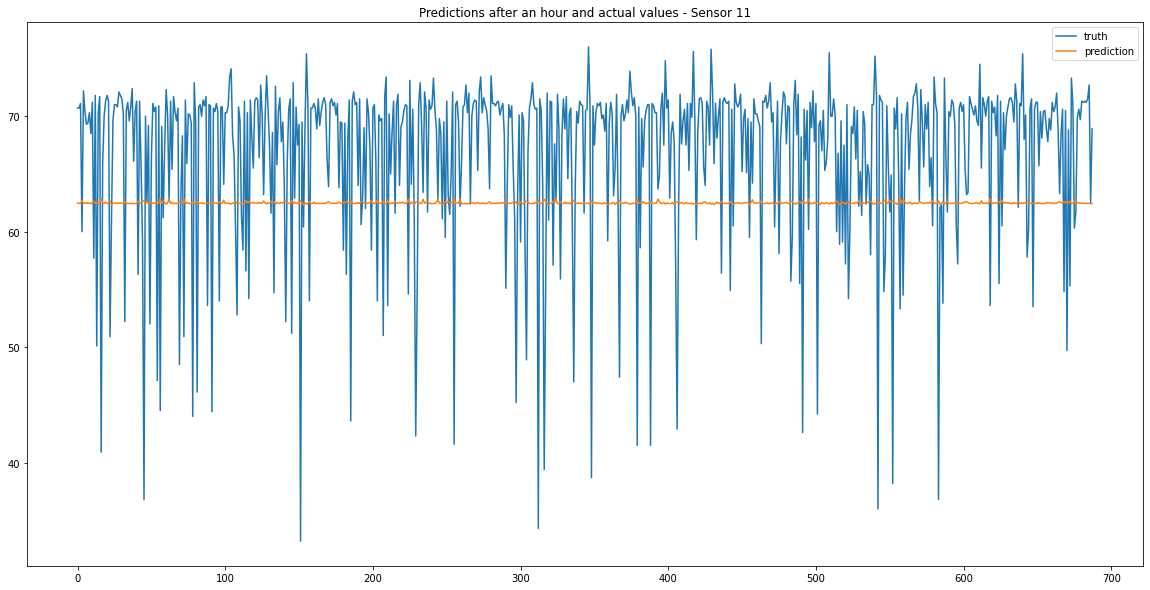

In [15]:
plt.figure(figsize = (20,10))
plt.plot(preds_train['truth'][11,:,0],label = "truth")
plt.plot(preds_train['prediction'][11,:,0],label = "prediction")
plt.title('Predictions after an hour and actual values - Sensor 11')
plt.legend(loc = "upper right")
plt.show()

In [82]:
import networkx
import numpy as np
import os


class create_dcrnn_data():
    '''
    This class takes a networkx graph with temporal values modeled into them and generates the adjacency matrix
    and adjacency matrix required by the DCRNN model.
    
    Each node is expected to have a series with index as datetime.
    '''
    
    def __init__(self,graph,**kwargs):
        self.graph = graph
        self.outdir = kwargs.get('outdir','')
        self.horizon = kwargs.get('horizon',12)
        
    def _createDataFrame(self):
        frame = list()
        for i in range(g.number_of_nodes()):
            frame.append(g.nodes[i]['values'])
        return pd.concat(frame,axis = 1).sort_index(inplace = False)
    
    def generateAdjacencyMatrix(self):
        return networkx.adjacency_matrix(self.graph)

    def generate_graph_seq2seq_io_data(self,df, x_offsets, y_offsets, add_time_in_day=True, add_day_in_week=False, scaler=None):
        """
        Return:
        # x: (epoch_size, input_length, num_nodes, input_dim)
        # y: (epoch_size, output_length, num_nodes, output_dim)
        """

        num_samples, num_nodes = df.shape
        data = np.expand_dims(df.values, axis=-1)
        data_list = [data]
        
        if add_time_in_day:
            time_ind = (df.index.values - df.index.values.astype("datetime64[D]")) / np.timedelta64(1, "D")
            time_in_day = np.tile(time_ind, [1, num_nodes, 1]).transpose((2, 1, 0))
            data_list.append(time_in_day)
        if add_day_in_week:
            day_in_week = np.zeros(shape=(num_samples, num_nodes, 7))
            day_in_week[np.arange(num_samples), :, df.index.dayofweek] = 1
            data_list.append(day_in_week)

        data = np.concatenate(data_list, axis=-1)
        
        # epoch_len = num_samples + min(x_offsets) - max(y_offsets)
        x, y = [], []
        
        # t is the index of the last observation.
        min_t = abs(min(x_offsets))
        max_t = abs(num_samples - abs(max(y_offsets)))  # Exclusive
        
        for t in range(min_t, max_t):
            x_t = data[t + x_offsets, ...]
            y_t = data[t + y_offsets, ...]
            x.append(x_t)
            y.append(y_t)
        x = np.stack(x, axis=0)
        y = np.stack(y, axis=0)
        return x, y

    
    def generate_train_val_test(self):
        df = self._createDataFrame()
        # Make sure to test what happens at horizon = 0
        x_offsets = np.sort(
            np.concatenate((np.arange(1 + (-1 * self.horizon), 1, 1),))
        )
        
        # Predict the next one hour
        y_offsets = np.sort(np.arange(1, self.horizon + 1, 1))

        # x: (num_samples, input_length, num_nodes, input_dim)
        # y: (num_samples, output_length, num_nodes, output_dim)
        x, y = self.generate_graph_seq2seq_io_data(
            df,
            x_offsets=x_offsets,
            y_offsets=y_offsets,
            add_time_in_day=True,
            add_day_in_week=False,
        )

        print("x shape: ", x.shape, ", y shape: ", y.shape)

        num_samples = x.shape[0]
        num_test = round(num_samples * 0.2)
        num_train = round(num_samples * 0.7)
        num_val = num_samples - num_test - num_train


        x_train, y_train = x[:num_train], y[:num_train]
        
        x_val, y_val = (
            x[num_train: num_train + num_val],
            y[num_train: num_train + num_val],
        )

        x_test, y_test = x[-num_test:], y[-num_test:]

        datasets = {}
        for cat in ["train", "val", "test"]:
            _x, _y = locals()["x_" + cat], locals()["y_" + cat]
            print(cat, "x: ", _x.shape, "y:", _y.shape)
            np.savez_compressed(
                os.path.join(self.outdir, "%s.npz" % cat),
                x=_x,
                y=_y,
                x_offsets=x_offsets.reshape(list(x_offsets.shape) + [1]),
                y_offsets=y_offsets.reshape(list(y_offsets.shape) + [1]),
            )
            datasets["x_" + cat] = _x
            datasets["y_" + cat] = _y

        return datasets
    
        

In [57]:
g = networkx.from_numpy_matrix(adj_max)

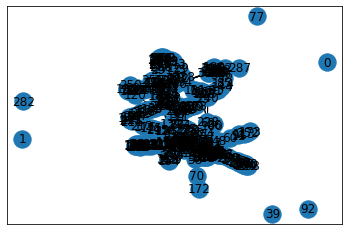

In [54]:
networkx.draw_networkx(g)

In [47]:
sensor_ind

{'401391': 148,
 '409528': 317,
 '407157': 263,
 '401014': 138,
 '401948': 183,
 '407176': 269,
 '401129': 139,
 '407174': 268,
 '401154': 140,
 '401606': 163,
 '400479': 68,
 '401997': 188,
 '407153': 261,
 '400227': 36,
 '401495': 155,
 '400222': 35,
 '400221': 34,
 '407348': 299,
 '403406': 232,
 '400700': 96,
 '400149': 22,
 '400148': 21,
 '400147': 20,
 '401567': 161,
 '400677': 92,
 '402285': 206,
 '400709': 97,
 '402283': 204,
 '400673': 91,
 '400904': 122,
 '401845': 172,
 '400869': 119,
 '407184': 274,
 '401846': 173,
 '407180': 272,
 '407181': 273,
 '402361': 213,
 '402360': 212,
 '402363': 215,
 '400863': 118,
 '402365': 217,
 '402364': 216,
 '402367': 219,
 '402366': 218,
 '407370': 306,
 '402060': 194,
 '402362': 214,
 '407202': 282,
 '400336': 52,
 '400330': 51,
 '400560': 77,
 '400563': 78,
 '400030': 2,
 '401489': 154,
 '400238': 38,
 '400567': 79,
 '400964': 131,
 '404640': 252,
 '402373': 225,
 '400236': 37,
 '407359': 301,
 '403404': 231,
 '400648': 85,
 '400649': 86

In [49]:
old_sensor_id = {sensor_ind[key]:key for key in sensor_ind}

In [51]:
hdf['speed'][400001]

2017-01-01 00:00:00    71.4
2017-01-01 00:05:00    71.6
2017-01-01 00:10:00    71.6
2017-01-01 00:15:00    71.1
2017-01-01 00:20:00    71.7
                       ... 
2017-06-30 23:35:00    70.9
2017-06-30 23:40:00    71.3
2017-06-30 23:45:00    71.4
2017-06-30 23:50:00    72.2
2017-06-30 23:55:00    71.5
Freq: <pandas._libs.properties.CachedProperty object at 0x7f5bd4fa1dc0>, Name: 400001, Length: 52116, dtype: float64

In [58]:
graph_data = hdf['speed']
for i in range(graph_data.shape[1]):
    g.nodes[i]['values'] = graph_data[int(old_sensor_id[i])]

In [83]:
c = create_dcrnn_data(g)

In [84]:
c.generate_train_val_test()

x shape:  (52093, 12, 325, 2) , y shape:  (52093, 12, 325, 2)
train x:  (36465, 12, 325, 2) y: (36465, 12, 325, 2)
val x:  (5209, 12, 325, 2) y: (5209, 12, 325, 2)
test x:  (10419, 12, 325, 2) y: (10419, 12, 325, 2)


{'x_train': array([[[[7.14000000e+01, 0.00000000e+00],
          [6.78000000e+01, 0.00000000e+00],
          [7.05000000e+01, 0.00000000e+00],
          ...,
          [6.88000000e+01, 0.00000000e+00],
          [7.11000000e+01, 0.00000000e+00],
          [6.80000000e+01, 0.00000000e+00]],
 
         [[7.16000000e+01, 3.47222222e-03],
          [6.75000000e+01, 3.47222222e-03],
          [7.06000000e+01, 3.47222222e-03],
          ...,
          [6.84000000e+01, 3.47222222e-03],
          [7.08000000e+01, 3.47222222e-03],
          [6.74000000e+01, 3.47222222e-03]],
 
         [[7.16000000e+01, 6.94444444e-03],
          [6.76000000e+01, 6.94444444e-03],
          [7.02000000e+01, 6.94444444e-03],
          ...,
          [6.84000000e+01, 6.94444444e-03],
          [7.05000000e+01, 6.94444444e-03],
          [6.79000000e+01, 6.94444444e-03]],
 
         ...,
 
         [[7.07000000e+01, 3.12500000e-02],
          [6.74000000e+01, 3.12500000e-02],
          [7.05000000e+01, 3.12500000e-